In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


___
<a name="section-1"></a>
## 1 - Car Plate Detection with OpenCV and Haar Cascade

#### Getting started with image preparation

In [1]:
#@title Step 1
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev
from IPython.display import HTML, clear_output
clear_output()
print("STEP 1 Done")

STEP 1 Done


In [2]:
#@title Step 2
! pip install pytesseract wand opencv-python
clear_output()
print("STEP 2 Done")

STEP 2 Done


In [3]:
# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract

# Set tesseract path to where the tesseract exe file is located (Edit this path accordingly based on your own settings)
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('car4.jpg')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

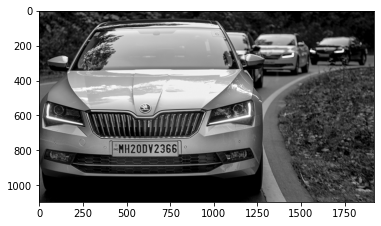

In [5]:
plt.imshow(carplate_img_rgb);

In [7]:
# Function to enlarge the plt display for user to view more clearly
def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

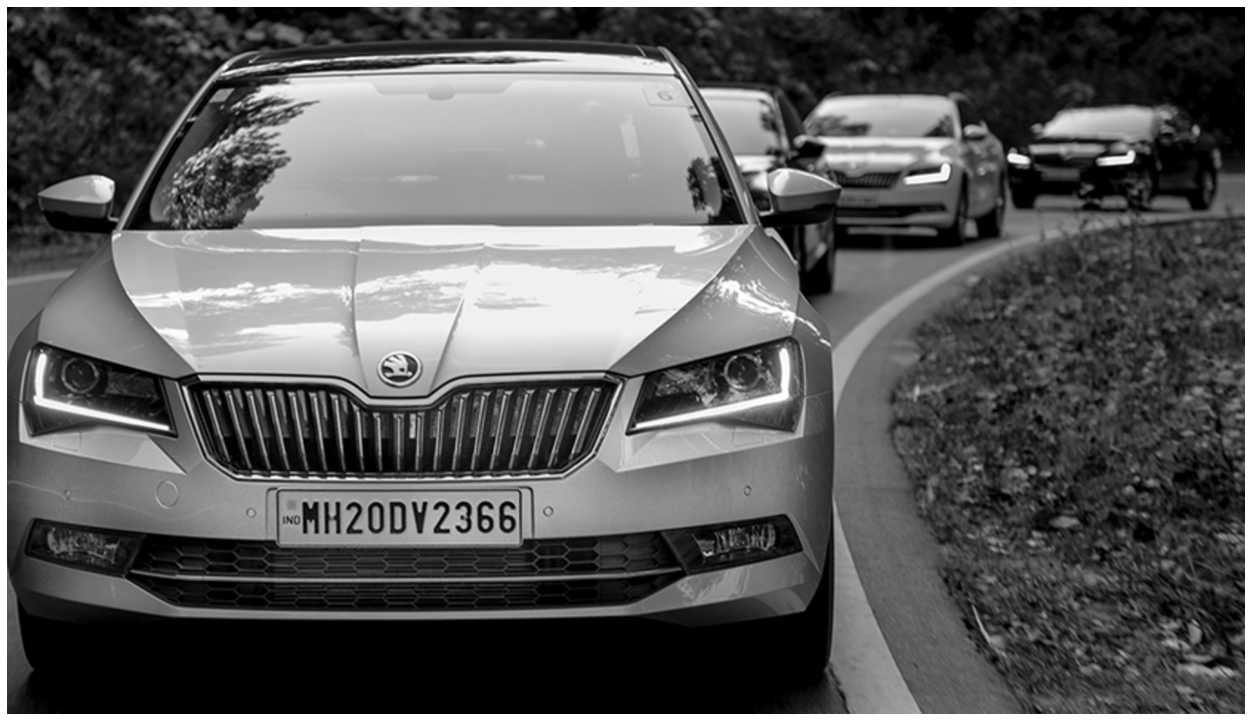

In [8]:
enlarge_plt_display(carplate_img_rgb, 1.2)

In [9]:
# Import Haar Cascade XML file for Russian car plate numbers
carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [10]:
# Setup function to detect car plate
def carplate_detect(image):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

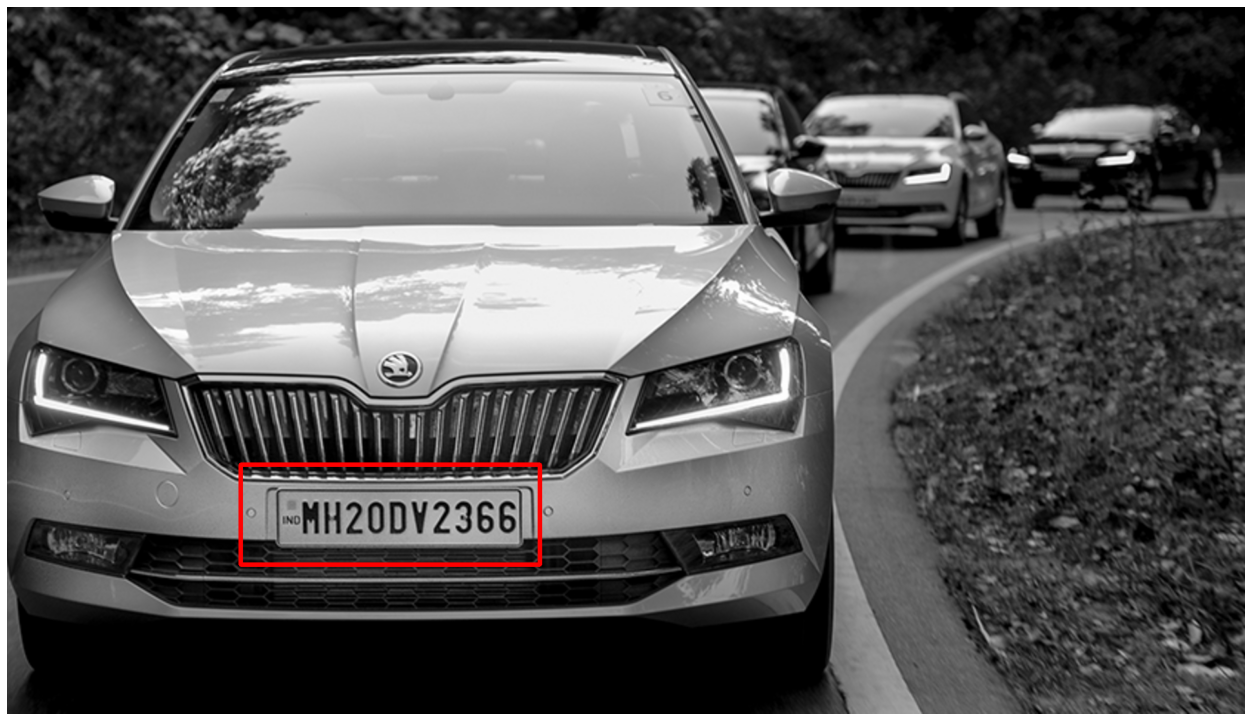

In [11]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.2)

___
<a name="section-2"></a>
## 2 - Car Plate Number Recognition and Extraction with TesseractOCR

#### Extract car license plate

In [12]:
# Function to retrieve only the car plate sub-image itself
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img

In [13]:
# Enlarge image for further image processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

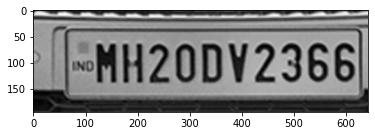

In [14]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

#### Begin series of image processing to improve accuracy of TesseractOCR's results

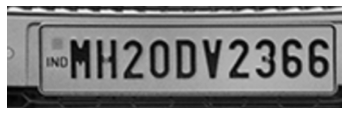

In [15]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

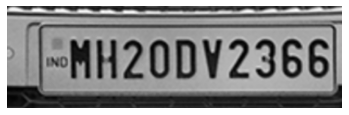

In [16]:
# Apply median blur + grayscale
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

In [17]:
# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                  config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

‘J-nn200v2366



In [18]:
# Testing all PSM values
for i in range(3,14):
    print(f'PSM: {i}')
    print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                      config = f'--psm {i} --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PSM: 3
\<MH20DV2366]

PSM: 4
\<MH20DV2366]

PSM: 5
co
co
cn
N
a
2
—)
N
—
=

PSM: 6
\<MH20DV2366]

PSM: 7
\<MH20DV2366]

PSM: 8
‘J-nn200v2366

PSM: 9
=MH20D¥2366

PSM: 10
\<MH20DV2366]

PSM: 11

PSM: 12

PSM: 13
‘J-nn200v2366

